## Reading and writing files

In [62]:
import numpy as np

In [63]:
# Reading text and csv files with no missing values use numpy.loadtxt
# Reading text and csv files with missing values use numpy.genfromtxt


# return a masked array masking out missing values (if usemask=True) or fill in the missing value with the value specified in filling_values


# With non-whitespace delimiters

with open('csv.txt', 'r') as f:
    print(f.read())

1, 2, 3
4,, 6
7, 8, 9


Masked array output

In [64]:
np.genfromtxt('csv.txt', delimiter=',', usemask=True)


masked_array(
  data=[[1.0, 2.0, 3.0],
        [4.0, --, 6.0],
        [7.0, 8.0, 9.0]],
  mask=[[False, False, False],
        [False,  True, False],
        [False, False, False]],
  fill_value=1e+20)

In [65]:
# One can also fill the values using
np.genfromtxt("csv.txt", delimiter=",", dtype=np.int8, filling_values=99)

array([[ 1,  2,  3],
       [ 4, 99,  6],
       [ 7,  8,  9]], dtype=int8)

Whitespace-delimited

In [66]:
# numpy.genfromtxt can also parse whitespace-delimited data files that have missing values if each field has a fixed width


# File with width=4. The data does not have to be justified, the last column can be less than width and delimiting character is required

with open('fixedwidth.txt','r') as f:
    data = (f.read())
print(data)

1   2      3
44      6
7   88889


In [67]:
# Showing spaces as ^

print(data.replace(" ", "^"))

1^^^2^^^^^^3
44^^^^^^6
7^^^88889


In [68]:
np.genfromtxt('fixedwidth.txt', delimiter=4)


array([[1.000e+00, 2.000e+00, 3.000e+00],
       [4.400e+01,       nan, 6.000e+00],
       [7.000e+00, 8.888e+03, 9.000e+00]])

## Where can the masked arrays be useful

In [69]:
# There are a few situations where masked arrays can be more useful than just eliminating the invalid entries of an array

# When you want to preserve the values you masked for later processing.without copying the array.

import numpy as np
import os

# The os.getcwd() function returns the current folder; you can change
# The filepath variable to point to the folder where you saved the .csv file

filepath = os.getcwd()
filename = os.path.join(filepath,'who_covid_19_sit_rep_time_series.csv')

In [70]:
filepath

'/home/susearc/Documents/github/Py_QuickNotes/numpy'

In [71]:
# The data file contains data of different types and is organized as follows:

# The first row is a header line that mostrly describes the data in each column that follow in the rows below, and beginning in ther fourth column, the header is the date of the observation

In [80]:
# We will be using skip_header and usecols to read only portions of the data file into each variable Read just the dates for columns 4-18 from the first row

dates = np.genfromtxt(
    filename,
    dtype=np.unicode_,
    delimiter=",",
    max_rows=1,
    usecols=range(4, 18),
    encoding='utf-8-sig'
)

In [81]:
dates

array(['1/21/20', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       '2/2/20', '2/3/20'], dtype='<U7')

In [82]:
# Read the names of the geographic locations from teh first two
# columns, skipping the first six rows

locations=np.genfromtxt(
    filename,
    dtype=np.unicode_,
    delimiter=',',
    skip_header=6,
    usecols=(0,1),
    encoding='utf-8-sig'
)

In [83]:
locations

array([['Hubei ', 'China'],
       ['Guangdong', 'China'],
       ['Henan', 'China'],
       ['Zhejiang', 'China'],
       ['Hunan', 'China'],
       ['Anhui', 'China'],
       ['Jiangxi', 'China'],
       ['Shandong', 'China'],
       ['Jiangsu', 'China'],
       ['Chongqing', 'China'],
       ['Sichuan', 'China'],
       ['Heilongjiang', 'China'],
       ['Beijing', 'China'],
       ['Shanghai', 'China'],
       ['Hebei', 'China'],
       ['Fujian', 'China'],
       ['Guangxi', 'China'],
       ['Shaanxi', 'China'],
       ['Yunnan', 'China'],
       ['Hainan', 'China'],
       ['Guizhou', 'China'],
       ['Tianjin', 'China'],
       ['Shanxi', 'China'],
       ['Liaoning', 'China'],
       ['Hong Kong', 'China'],
       ['Jilin', 'China'],
       ['Gansu', 'China'],
       ['Xinjiang', 'China'],
       ['Inner Mongolia', 'China'],
       ['Ningxia', 'China'],
       ['Taiwan', 'China'],
       ['Qinghai', 'China'],
       ['Macau', 'China'],
       ['Xizang', 'China'],
       ['Uns

In [84]:
# Read the numeric data from just the first 14 days

nbcases = np.genfromtxt(
    filename,
    dtype=np.int_,
    delimiter=',',
    skip_header=6,
    usecols=range(4, 18),
    encoding='utf-8-sig'
)

In [85]:
nbcases

array([[  258,   270,   375, ...,  7153,  9074, 11177],
       [   14,    17,    26, ...,   520,   604,   683],
       [   -1,     1,     1, ...,   422,   493,   566],
       ...,
       [   -1,    -1,    -1, ...,    -1,    -1,    -1],
       [   -1,    -1,    -1, ...,    -1,    -1,    -1],
       [   -1,    -1,    -1, ...,    -1,    -1,    -1]])

## Exploring the data

In [86]:
dates

array(['1/21/20', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       '2/2/20', '2/3/20'], dtype='<U7')

Text(0.5, 1.0, 'COVID-19 cumulative cases from Jan 21 to Feb 3 ')

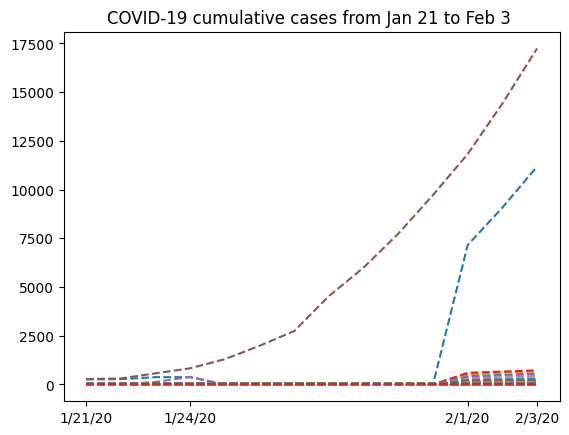

In [87]:
# First of all, we can plot the whole set of data we have and see what it looks like. In order to get a readable plot, we select only a few of the dates to show in our x-axis ticks. Not ealso that in our plot command we use nbcases.T since this means we will plot each row of the file as a separate line. We choose to plot a dashed line


import matplotlib.pyplot as plt


selected_dates = [0,3,11,13]
plt.plot(dates, nbcases.T, "--")
plt.xticks(selected_dates, dates[selected_dates])
plt.title('COVID-19 cumulative cases from Jan 21 to Feb 3 ')

In [88]:
locations

array([['Hubei ', 'China'],
       ['Guangdong', 'China'],
       ['Henan', 'China'],
       ['Zhejiang', 'China'],
       ['Hunan', 'China'],
       ['Anhui', 'China'],
       ['Jiangxi', 'China'],
       ['Shandong', 'China'],
       ['Jiangsu', 'China'],
       ['Chongqing', 'China'],
       ['Sichuan', 'China'],
       ['Heilongjiang', 'China'],
       ['Beijing', 'China'],
       ['Shanghai', 'China'],
       ['Hebei', 'China'],
       ['Fujian', 'China'],
       ['Guangxi', 'China'],
       ['Shaanxi', 'China'],
       ['Yunnan', 'China'],
       ['Hainan', 'China'],
       ['Guizhou', 'China'],
       ['Tianjin', 'China'],
       ['Shanxi', 'China'],
       ['Liaoning', 'China'],
       ['Hong Kong', 'China'],
       ['Jilin', 'China'],
       ['Gansu', 'China'],
       ['Xinjiang', 'China'],
       ['Inner Mongolia', 'China'],
       ['Ningxia', 'China'],
       ['Taiwan', 'China'],
       ['Qinghai', 'China'],
       ['Macau', 'China'],
       ['Xizang', 'China'],
       ['Uns

In [89]:
# This graph has a strange shape form jan 24th to feb 1st. It would be interesting to know where this data comes from. If we ook at the locations array we extracted from teh .csv file, we can seee that we have two columns. Where the first would contain regions and the second would contain the name of the country. However only the first few rows contain data for the first column (province names in China). Following that we only have country names. SO it would make sense to group all the data form China into a single row. For this we will select from the nbcases array only the rows for which the second entry of the locations array corresponds to China. Next we will use the numpy.sum funciton to sum all teh selected rows 


total_row = 35

locations = np.delete(locations, (total_row), axis=0)
nbcases = np.delete(nbcases, (total_row), axis=0)

china_total = nbcases[locations[:, 1] == "China"].sum(axis=0)

## Missing data

In [91]:
nbcases

array([[  258,   270,   375, ...,  7153,  9074, 11177],
       [   14,    17,    26, ...,   520,   604,   683],
       [   -1,     1,     1, ...,   422,   493,   566],
       ...,
       [   -1,    -1,    -1, ...,    -1,    -1,    -1],
       [   -1,    -1,    -1, ...,    -1,    -1,    -1],
       [   -1,    -1,    -1, ...,    -1,    -1,    -1]])

In [92]:
## all the values of -1 are coming from numpy.genfromtxt attempting to read missing data from the original .csv file. However we would love to skip this value so it doesnt interfere in our analysis. After importing the numpy.ma module, we will create a new array, this time masking the invalid values:

from numpy import ma
nbcases_ma = ma.masked_values(nbcases, -1)

In [93]:
nbcases_ma

masked_array(
  data=[[258, 270, 375, ..., 7153, 9074, 11177],
        [14, 17, 26, ..., 520, 604, 683],
        [--, 1, 1, ..., 422, 493, 566],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-1)

Text(0.5, 1.0, 'COVID-19 cumulative cases from jan 21 to feb 3')

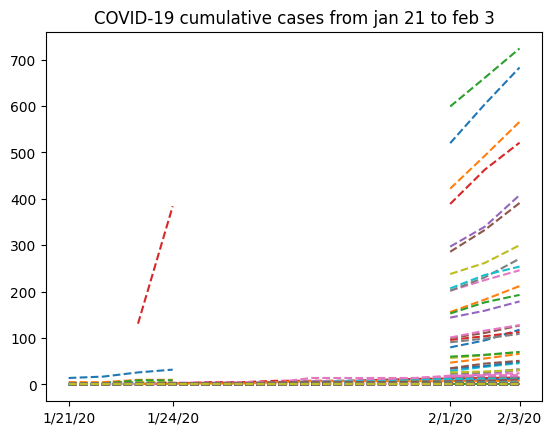

In [94]:
# we can see that this is a different kind of array. As mentioned in the introduction, it has three attributes (data, mask) and fill_value_. Keep in mind that the mask attribute  has a True value for elemnts corresponding to invalid data

plt.plot(dates, nbcases_ma[1:].T, "--")
plt.xticks(selected_dates, dates[selected_dates])
plt.title('COVID-19 cumulative cases from jan 21 to feb 3')

In [95]:
#Now that our data has been masked lets try summing up all the cases in China

china_masked = nbcases_ma[locations[:,1] == "China"].sum(axis=0)
china_masked

masked_array(data=[278, 309, 574, 835, 10, 10, 17, 22, 23, 25, 28, 11821,
                   14411, 17238],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False],
       fill_value=999999)

In [96]:
# the  china_masked is a masked array, sot it has a different data structure than a regular numpy array.Now we can access its data directly by using the .data attribute


china_total = china_masked.data
china_total

array([  278,   309,   574,   835,    10,    10,    17,    22,    23,
          25,    28, 11821, 14411, 17238])

In [97]:
# That is better: no more negative values. However we can still see that for some day, the cumulative number of cases seems to go down , which does not agree with the definition of cumulative data. If we look more closely at the data we can see whta in the period where there was missing data in mainland china, there was valid data for HongKong, Taiwan Macau and "Unspecified " regions of China. Maybe we can remove those from the total sum of cases in China, to get a better understanding of the data


china_mask = (
    (locations[:,1] == "China")
    & (locations[:, 0] != "Hong Kong")
    & (locations[:, 0] != "Taiwan")
    & (locations[:, 0] != "Macau")
    & (locations[:, 0] != "Unspecified")
)

In [98]:
china_mask.nonzero()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 31, 33, 34]),)

In [99]:
# Now we can correctly sum entries for mainland China:

china_total = nbcases_ma[china_mask].sum(axis=0)
china_total

masked_array(data=[278, 308, 571, 830, --, --, --, --, --, --, --, 11791,
                   14380, 17205],
             mask=[False, False, False, False,  True,  True,  True,  True,
                    True,  True,  True, False, False, False],
       fill_value=999999)

Text(0.5, 1.0, 'COVID-19 cumulative cases from jan 21 to feb 3 - Mainland China')

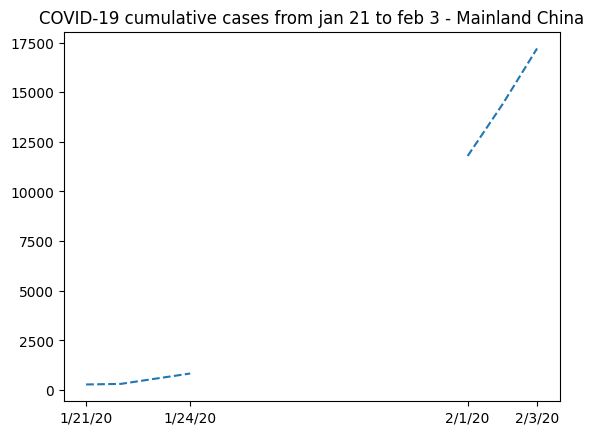

In [100]:
plt.plot(dates, china_total.T, "--")
plt.xticks(selected_dates, dates[selected_dates])
plt.title("COVID-19 cumulative cases from jan 21 to feb 3 - Mainland China")


In [101]:
# Quite clear that masked arrays are the right solution here. We cannot represent the missing data wihout mischaracterizing the evolution of the curve.

## Fitting Data

In [102]:
# One possibility we can think of is to interpolate the missing data to estimate the number of cases in late jan. Observe that we can select the masked elements using the .mask attribute:


china_total.mask
invalid = china_total[china_total.mask]
invalid

masked_array(data=[--, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True],
       fill_value=999999,
            dtype=int64)

In [103]:
# We can also access teh valid entries by using the logival negation for this mask:

valid = china_total[~china_total.mask]
valid

masked_array(data=[278, 308, 571, 830, 11791, 14380, 17205],
             mask=[False, False, False, False, False, False, False],
       fill_value=999999)

In [104]:
# Now if we want to creat a very simple approximation for this data, we should take into account the valid entries around the invalid ones. SO first lets  select the dates for which the data is valid. Note that we can use the mask from the china_toal masked array to index the dates array:


dates[~china_total.mask]

array(['1/21/20', '1/22/20', '1/23/20', '1/24/20', '2/1/20', '2/2/20',
       '2/3/20'], dtype='<U7')

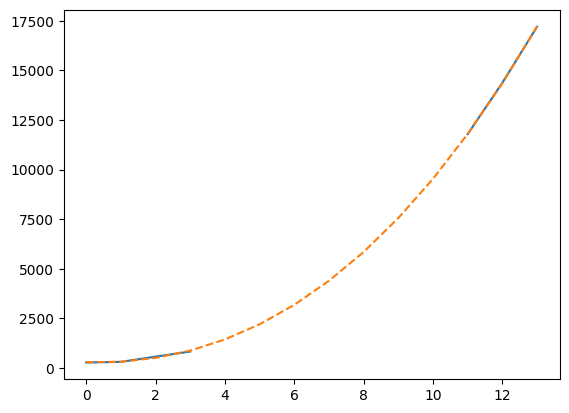

In [106]:
# Finally we can also use the fitting funcitonality of the np.polynomial package to create a cubic polynomial model that fits the data as best as possibile:


t = np.arange(len(china_total))
model = np.polynomial.Polynomial.fit(t[~china_total.mask], valid, deg=3)
plt.plot(t, china_total)
plt.plot(t, model(t), "--")

ConversionError: Failed to convert value(s) to axis units: ['Mainland China', 'cubic estimate', '7 days after start']

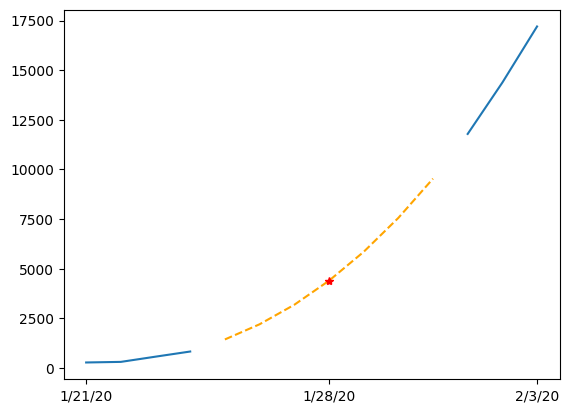

In [108]:
# This plot is not so readable since the liens seem to be over each other, so lets summarize in amore elaborate plot. WE will plot the real data when available, and show the cubic fit for unavailable data, using this fit to compute an estimate to the observed number of cases on jan, 7 days after the beginning of the records


plt.plot(t, china_total)
plt.plot(t[china_total.mask], model(t)[china_total.mask], '--', color='orange')
plt.plot(7, model(7), 'r*')
plt.xticks([0,7,13], dates[[0,7,13]])
plt.yticks(['Mainland China', "cubic estimate", "7 days after start"])
plt.title("")